In [29]:
import pandas as pd
import pickle as pkl

In [32]:
valdf=pd.read_pickle('/scratch/izar/tcastigl/data/classification_dataset/train/UNM_29_train.pkl')
#valdf=pd.read_pickle('/scratch/izar/tcastigl/data/classification_dataset/train/UNM_29_train.pkl')
#valdf.dataset=valdf.dataset.astype('category')
print(valdf.info())
print(valdf.signal.apply(len))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 296 to 3498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   read_id  6690 non-null   object  
 1   signal   6690 non-null   object  
 2   dataset  6690 non-null   category
dtypes: category(1), object(2)
memory usage: 163.3+ KB
None
296      9870
7129    99659
3383    25275
8892    85666
7308    39768
        ...  
6958     5211
8149    69128
4716    43407
2898    27294
3498    29533
Name: signal, Length: 6690, dtype: int64


In [33]:
valdf.to_csv('/home/tcastigl/UNM29_train.csv')

In [31]:
csvdf=pd.read_csv('/home/tcastigl/UNM29_train.csv')
#pkldf=pd.read_pickle('/home/tcastigl/UNM29_train.pkl')
print(csvdf.info())
print(csvdf.signal.apply(len))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6690 entries, 0 to 6689
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6690 non-null   int64 
 1   read_id     6690 non-null   object
 2   signal      6690 non-null   object
 3   dataset     6690 non-null   object
dtypes: int64(1), object(3)
memory usage: 209.2+ KB
None
0       29
1       29
2       29
3       29
4       29
        ..
6685    29
6686    29
6687    29
6688    29
6689    35
Name: signal, Length: 6690, dtype: int64


In [3]:
tailres_files=['UNM_54_sample.csv','h5mC_1_sample.csv','m5C_5_sample.csv','m6A_54_sample.csv', 'pU_1_sample.csv',
            'pU_stoch_5_sample.csv']
tailfindr_paths=[os.path.join(datadir,file) for file in tailres_files]
tail_sample_df=pd.concat((pd.read_csv(path) for path in tailfindr_paths), ignore_index=True)

In [4]:
tail_sample_df['read_id'] ='read_'+tail_sample_df['read_id'].astype(str)

In [5]:
data_sample_df['signal_length']=data_sample_df['signal'].str.len()
data_sample_df['seq_length']=data_sample_df['seq_fastq'].str.len()

In [6]:
#tail_sample_df=tail_sample_df.loc[tail_sample_df['read_id']==data_sample_df['read_id']]
data_sample_df=data_sample_df.merge(tail_sample_df,how='inner',on='read_id')
data_sample_df=data_sample_df.drop(columns='fast5_filename')

In [13]:
data_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5919
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   read_id                5432 non-null   object 
 1   type                   5432 non-null   object 
 2   signal                 5432 non-null   object 
 3   move                   5432 non-null   object 
 4   trace                  5432 non-null   object 
 5   seq_fastq              5432 non-null   object 
 6   stride                 5432 non-null   int64  
 7   first_sample_template  5432 non-null   float64
 8   sampling_freq          5432 non-null   float64
 9   signal_length          5432 non-null   int64  
 10  seq_length             5432 non-null   int64  
 11  tail_start             5432 non-null   float64
 12  tail_end               5432 non-null   float64
 13  samples_per_nt         5432 non-null   float64
 14  tail_length            5432 non-null   float64
 15  file

In [8]:
data_sample_df[data_sample_df['signal_length'] > 200000].shape[0]

54

read_id               read_0ede6753-40a9-4020-bd00-6e4eb9f9b589
signal        [491, 458, 452, 459, 447, 459, 460, 448, 456, ...
tail_start                                                 7309
tail_end                                                  15284
type                                                   pU_stoch
Name: 5135, dtype: object


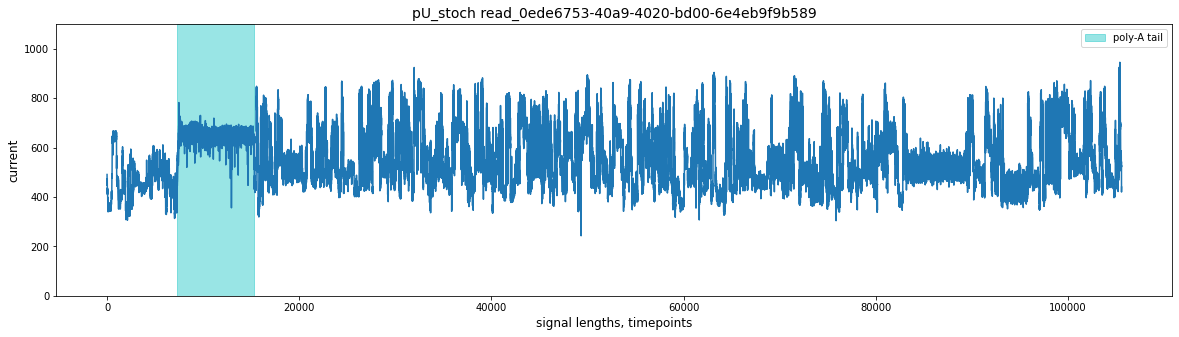

In [60]:
read0=data_sample_df.loc[5135][['read_id','signal','tail_start','tail_end','type']]
print(read0)
plt.figure(figsize=(20,5))
plt.plot(range(len(read0['signal'])),read0['signal'])
plt.axvspan(read0['tail_start'],read0['tail_end'],color='c',alpha=.4, label='poly-A tail')
plt.title(read0.type + ' '+read0.read_id, fontsize=14)
plt.xlabel('signal lengths, timepoints',  fontsize=12)
plt.ylabel('current',  fontsize=12)
plt.ylim(0,1100)
plt.legend()
plt.savefig(f'plots/tailfindr_{read0.type}_{read0.read_id}.png')

In [23]:
curlcakepath='/scratch/ONT_samuel/Novoa/curlcakes_1-4.txt'
curls=[]
curl_lengths=[]
with open(curlcakepath) as f:
    whole = f.read()
    curls_raw=whole.split('>')
    for curl_raw in curls_raw[1:]:
        curl=curl_raw[32:-2]
        curls.extend([curl])
    for curl in curls :
        curl_lengths.extend([len(curl)])
    f.close()
longest_curl,shortest_curl=max(curl_lengths),min(curl_lengths)

In [20]:
print(data_sample_df.shape[0])
data_sample_df=data_sample_df.dropna()
data_sample_cleaned_df=data_sample_df.drop(data_sample_df[data_sample_df['seq_length'] > 4000].index, ignore_)
data_sample_cleaned_df=data_sample_cleaned_df.drop(data_sample_cleaned_df[data_sample_cleaned_df['seq_length'] < 10].index)
data_sample_cleaned_df=data_sample_cleaned_df.drop(data_sample_cleaned_df[data_sample_cleaned_df['signal_length'] > 2e5].index)
print(data_sample_cleaned_df.shape[0])

5432
5255


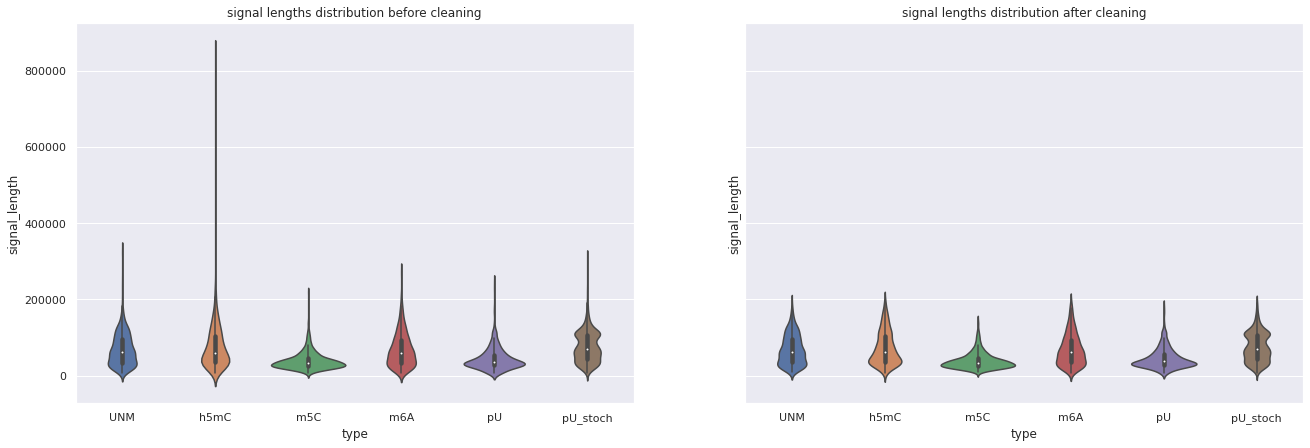

In [21]:
sns.set(rc={'figure.figsize':(22,7)})
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('signal lengths distribution before cleaning')
ax2.set_title('signal lengths distribution after cleaning')
sns.violinplot(x=data_sample_df.type, y=data_sample_df.signal_length, data=data_sample_df,ax=ax1)
sns.violinplot(x=data_sample_cleaned_df.type, y=data_sample_cleaned_df.signal_length, data=data_sample_cleaned_df, ax=ax2)
plt.savefig('plots/violinplot_signal_lengths_per_mod.png')

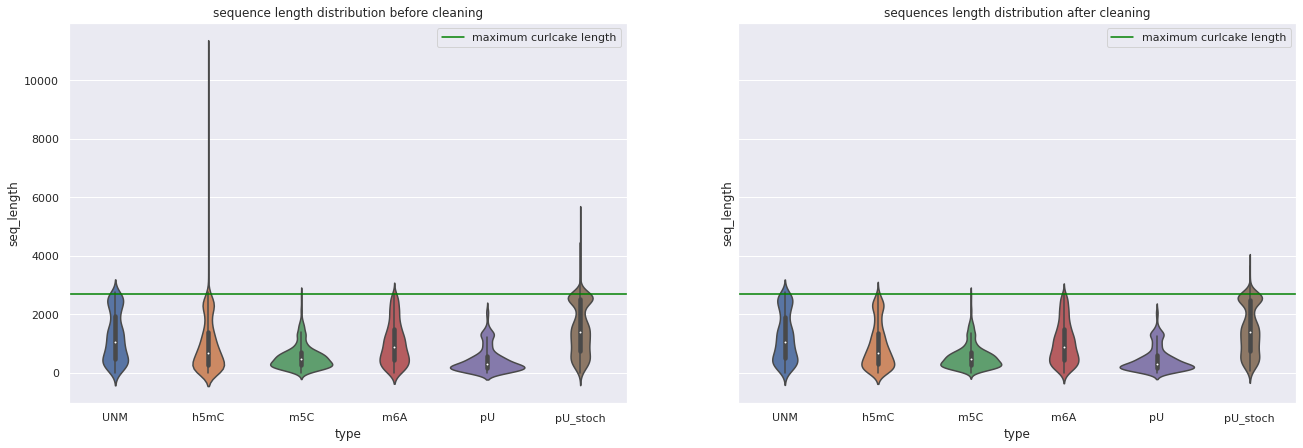

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('sequence length distribution before cleaning')
ax2.set_title('sequences length distribution after cleaning')
sns.violinplot(x=data_sample_df.type, y=data_sample_df.seq_length, data=data_sample_df, ax=ax1)
ax1.axhline(longest_curl, color='green',label='maximum curlcake length')
sns.violinplot(x=data_sample_cleaned_df.type, y=data_sample_cleaned_df.seq_length, data=data_sample_cleaned_df, ax=ax2)
ax2.axhline(longest_curl, color='green',label='maximum curlcake length')
ax1.legend()
ax2.legend()
plt.savefig('plots/violinplot_seq_lengths_per_mod.png')

In [25]:
data_sample_cleaned_df.to_pickle('/home/tcastiglione/data/full_sample_df.pkl')

In [1]:
import pandas as pd
import os
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from itertools import cycle
import random
import csv
from basecall_viz_utils import get_signal_basecall_for_plotting

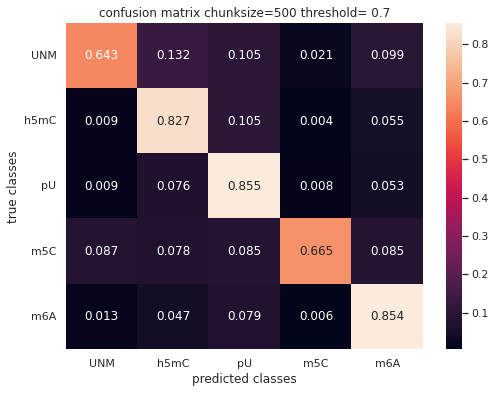

In [18]:
df=pd.read_csv('confmateval_probas_curlk_500_big_thresh.csv')
classes = ['UNM','h5mC','pU','m5C','m6A']
df=df.drop('Unnamed: 0', axis=1)
df.set_axis(classes, axis=0, inplace=True)
df.set_axis(classes, axis=1, inplace=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df, annot=True, fmt='.3f')
plt.title('confusion matrix chunksize=500 threshold= 0.7')
plt.ylabel('true classes')
plt.xlabel('predicted classes')
plt.yticks(rotation=0)
plt.savefig('plots/cm_500_thres_big.png',dpi=300)

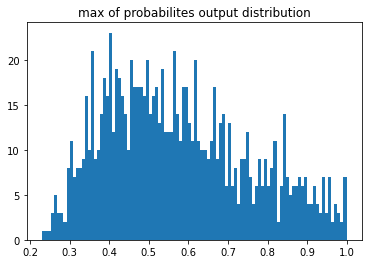

In [8]:
df=pd.read_csv('probas_df.csv')
df=df.drop('Unnamed: 0',axis=1)
preds=df.drop('pred',axis=1).max(axis=1)
plt.hist(preds,bins=100)
plt.title('max of probabilites output distribution')
plt.show()

In [26]:
evaldf=pd.read_pickle('/scratch/izar/tcastigl/datasets/classification_dataset_conformer_12keach/val.pkl')
evaldf=evaldf.head(100)
evaldf.to_pickle('/work/upnae/thomas_trna/data/test_probas_12k/val.pkl')

In [6]:
ypredscore_df=pd.read_csv('y_pred_scores.csv')
ypredscore_df.drop('Unnamed: 0', inplace=True, axis=1)
y_true_raw=np.loadtxt('y_true.txt').astype(int)
y_true=np.zeros((y_true_raw.size,y_true_raw.max()+1))
y_true[np.arange(y_true_raw.size),y_true_raw]=1
ypredscore=ypredscore_df.to_numpy()
y_true


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [7]:
fpr = dict()
tpr = dict()
n_classes=y_true.shape[1]
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], ypredscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

{0: 0.9987968593435984,
 1: 0.9983378312777345,
 2: 0.9983531310139097,
 3: 0.9988303244330903,
 4: 0.9974921049292073}

/home/tcastigl/tRNA/trna_scitas/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # Remove the CWD from sys.path while we load stuff.


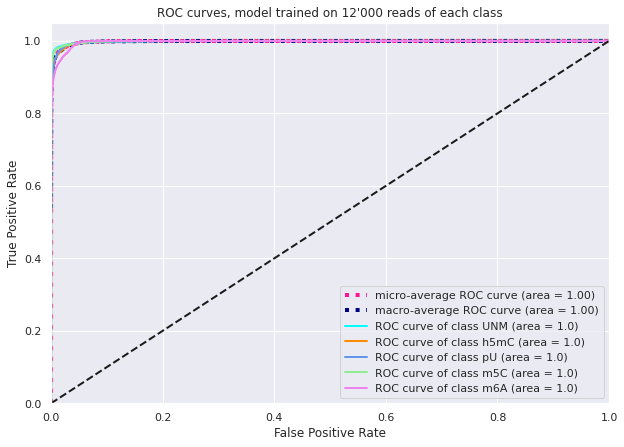

In [8]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), ypredscore.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure(figsize=(10,7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue",'lightgreen','violet'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label=f'ROC curve of class {classes[i]} (area = {round(roc_auc[i],2)})',
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves, model trained on 12'000 reads of each class")
plt.legend(loc="lower right")
#plt.savefig('plots/ROC_AUC_12kall.png')
plt.show()

In [23]:
df=pd.read_pickle('/work/upnae/thomas_trna/data/classification_dataset_conformer_1k/train.pkl')
df.info()
sum([len(x) for x in df.signal])/len([len(x) for x in df.signal])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3343 entries, 949 to 4615
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   read_id  3343 non-null   object  
 1   signal   3343 non-null   object  
 2   dataset  3343 non-null   category
dtypes: category(1), object(2)
memory usage: 81.7+ KB


45246.32784923721

median samples_per_nt UNM=28, h5mC=33, m5C=31, m6A=32, pU=37, so chunks of 500 timepoints (~16 nt per chunk)

In [10]:
df=df.astype({'dataset':'category'})
print(df.info())
df.to_pickle('/work/upnae/thomas_trna/data/classification_dataset_conformer_12K_readsandadapt/val.pkl')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60795 entries, 4433 to 4110
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   read_id  60795 non-null  object  
 1   signal   60795 non-null  object  
 2   dataset  60795 non-null  category
dtypes: category(1), object(2)
memory usage: 1.4+ MB
None


In [94]:
df=pd.read_pickle('/work/upnae/thomas_trna/data/classification_dataset_conformer_chunks_curlk/train.pkl')
df.reset_index(inplace=True)
df.shape

(111615, 4)

In [95]:
df_whole=pd.read_pickle('/work/upnae/thomas_trna/data/classification_dataset_conformer_12keach/train.pkl')
df_whole.reset_index(inplace=True)
print(df_whole.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39356 entries, 0 to 39355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   index    39356 non-null  int64   
 1   read_id  39356 non-null  object  
 2   signal   39356 non-null  object  
 3   dataset  39356 non-null  category
dtypes: category(1), int64(1), object(2)
memory usage: 961.0+ KB
None


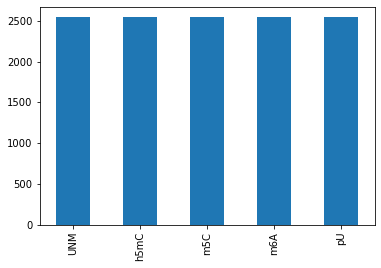

In [65]:
df.dataset.value_counts().plot(kind='bar')

In [97]:
print(df[df.read_id == 'read_643b051f-d182-4b9f-bd4d-8ed6596ca8f8'].shape)
df.loc[5]

(8, 4)


index                                                  68832
read_id            read_643b051f-d182-4b9f-bd4d-8ed6596ca8f8
signal     [751, 738, 656, 755, 775, 698, 761, 722, 693, ...
dataset                                                  UNM
Name: 5, dtype: object

(8, 4)
       index                                    read_id  \
38102   5347  read_643b051f-d182-4b9f-bd4d-8ed6596ca8f8   

                                                  signal dataset  
38102  [717, 731, 719, 714, 728, 704, 700, 694, 705, ...     UNM  
0    UNM
1    UNM
2    UNM
3    UNM
4    UNM
5    UNM
6    UNM
7    UNM
Name: dataset, dtype: category
Categories (5, object): ['UNM', 'h5mC', 'm5C', 'm6A', 'pU']


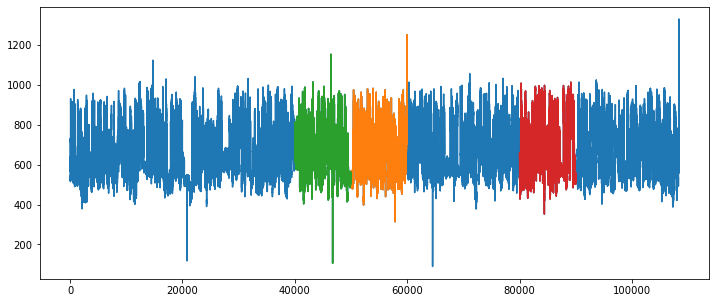

In [102]:
rid='read_643b051f-d182-4b9f-bd4d-8ed6596ca8f8'
plt.figure(figsize=(12,5))
rid_df=df[df.read_id == rid]
print(rid_df.shape)
rid_df.reset_index(inplace=True)
plt.plot(range(len(df_whole[df_whole.read_id == rid].signal.item())),df_whole[df_whole.read_id == rid].signal.item())
plt.plot(range(50000,60000),rid_df.signal.loc[5])
plt.plot(range(40000,50000),rid_df.signal.loc[0])
plt.plot(range(80000,90000),rid_df.signal.loc[1])
print(df_whole[df_whole.read_id == rid])
print(rid_df.dataset)

In [86]:
df_whole[df_whole.read_id == rid].signal.item().shape

(51646,)

In [75]:
id=df.read_id.loc[0]
print(df[df.read_id == rid].signal)
print(len(df_whole[df_whole.read_id == rid].signal.item()))

Series([], Name: signal, dtype: object)
25137


read_9528ae3a-d5f5-4def-a729-31a4c99567b9
44789.51246284015


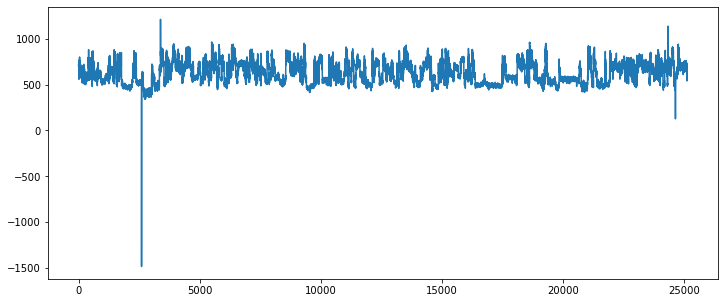

In [74]:
idx=5
plt.figure(figsize=(12,5))
rid=df_whole.loc[idx,'read_id']
print(rid)
plt.plot(range(len(df_whole.signal.loc[idx])),df_whole.signal.loc[idx])
print(df_whole.signal.apply(len).mean())

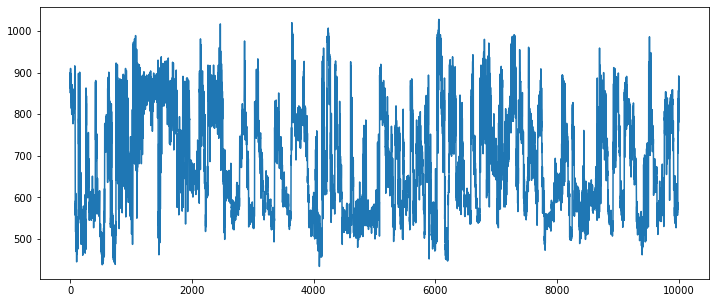

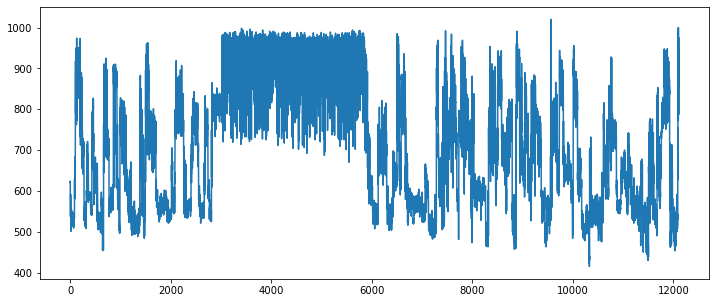

In [46]:
plt.figure(figsize=(12,5))
plt.plot(range(10000),df[df.read_id == id].signal.loc[0])
plt.figure(figsize=(12,5))
plt.plot(range(len(df_whole[df_whole.read_id == id].signal.item())),df_whole[df_whole.read_id == id].signal.item())

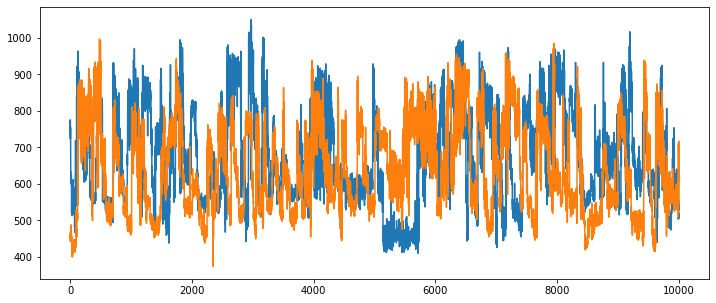

In [136]:
plt.figure(figsize=(12,5))
plt.plot(range(10000),df_whole.signal.loc[ind].item()[:10000])
plt.plot(range(10000),df.signal.loc[8])

In [2]:
df=pd.read_pickle('/scratch/tcastigl/data/ONT_reads0.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   read_id  4000 non-null   object
 1   signal   4000 non-null   object
 2   move     4000 non-null   object
 3   trace    4000 non-null   object
 4   seq      4000 non-null   object
dtypes: object(5)
memory usage: 156.4+ KB


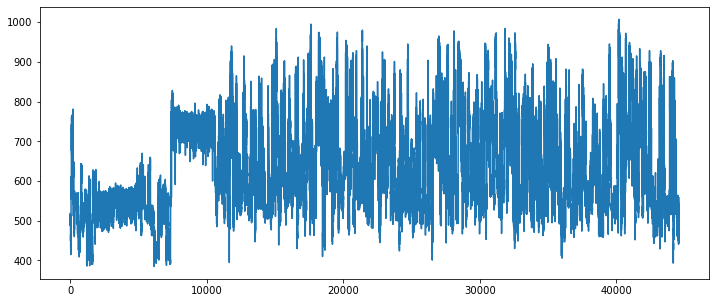

In [4]:
sign=df.signal.loc[0]
plt.figure(figsize=(12,5))
plt.plot(range(len(sign)),sign)

In [5]:
np.mean(df.signal.apply(len))

62872.84525

In [85]:
df_whole.read_id.loc[5]

'read_9528ae3a-d5f5-4def-a729-31a4c99567b9'

In [138]:
ind=df_whole.index[df_whole.read_id.isin(df.read_id.loc[0:10])]
print(df_whole.loc[ind])

      index                                    read_id  \
997    2334  read_5b89edac-ab54-419a-9478-ede725ccc039   
1282   2841  read_e057d924-bce8-40a8-8f2f-70e741c46e90   
1506   2241  read_44c9218f-c281-4601-a038-c5edbf71affb   
1882    395  read_61dc2801-6691-4bb2-b9e0-8159b43a80db   
2396   5140  read_2d214b7b-a3b4-4bfc-96ad-56a3c82722bf   
2792   5803  read_d9375842-9f15-43c0-9d33-0def72c083c3   
4061   9081  read_2fcc41bb-90fb-4bd3-a374-8ce8180f8fd6   

                                                 signal dataset  
997   [756, 764, 759, 770, 753, 744, 766, 767, 760, ...     UNM  
1282  [868, 882, 877, 891, 873, 894, 852, 863, 756, ...     UNM  
1506  [567, 531, 503, 513, 519, 507, 490, 513, 499, ...     UNM  
1882  [674, 659, 654, 660, 681, 685, 661, 668, 672, ...     UNM  
2396  [752, 775, 740, 775, 724, 739, 755, 747, 723, ...     UNM  
2792  [704, 714, 729, 737, 738, 624, 608, 555, 584, ...     UNM  
4061  [621, 624, 607, 588, 574, 573, 548, 537, 554, ...     UNM  


In [144]:
df_whole.loc[ind,'signal'].apply(len)

997     111901
1282    141977
1506    110554
1882      9412
2396     58394
2792      7474
4061     12109
Name: signal, dtype: int64

In [145]:
df.signal.loc[0:10].apply(len)

0     10000
1     10000
2     10000
3     10000
4     10000
5     10000
6     10000
7     10000
8     10000
9     10000
10    10000
Name: signal, dtype: int64

In [5]:
df_ad=pd.read_pickle('/work/upnae/thomas_trna/data/val_set_adapters_only2/train.pkl')
df_ad.head()

,read_id,signal,dataset
0,read_00fd027b-bd6e-4700-8fea-fc8b78a6e5a6,"[521, 540, 549, 557, 523, 502, 508, 496, 500, ...",m6A
1,read_011d8397-4fed-4672-80f5-102c63c28fbc,"[866, 585, 614, 612, 605, 605, 581, 580, 602, ...",m6A
2,read_0154e6ba-f3f2-42fe-a56f-4aedeab7573b,"[505, 513, 510, 490, 459, 478, 468, 471, 470, ...",m6A
3,read_01736e55-aed6-4cc4-891e-92f793d8b13c,"[1048, 498, 518, 509, 522, 494, 526, 551, 536,...",m6A
6,read_01f73a87-1b26-4e7d-b6a8-d9d4f0eab8ab,"[604, 571, 587, 568, 567, 565, 576, 528, 549, ...",m6A


In [19]:
df_tail=pd.read_csv('/scratch/tcastigl/data/tail_findr_liver_res/0/out_liver_0.csv')
rid='c76cd2-0389-46da-869c-3ddaaaed0bc6'
len(df_tail.read_id.loc[0])

36

In [5]:
path='/scratch/tcastigl/data/ONT_liver_df/0'


In [7]:
df=pd.read_pickle(path+'/ONT_liver_0.pkl')
df.head()

,read_id,signal,move,trace,seq,stride,first_sample_template
0,read_000ea97b-eec2-4ce1-bf34-7ed840fdcd81,"[714, 581, 572, 567, 557, 562, 569, 548, 606, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[11, 7, 25, 208, 4, 0, 0, 1], [210, 5, 28, 6,...",GAUAAGAAAGACGUGAGCACGGCGGACAGACUGCCAUUCCCUCACC...,10,5954
1,read_00119dd5-580d-4122-b638-794c7aec5e4e,"[391, 391, 383, 381, 364, 365, 366, 375, 381, ...","[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[[146, 1, 19, 86, 3, 0, 0, 0], [98, 1, 19, 66,...",GAUUCAAGCUGAUGUGGUCCGAUCUGAUACGAAUUUGCUCUGACAC...,10,8157
2,read_00191c9e-5d77-432b-b19d-461062d5fdc6,"[556, 543, 400, 544, 413, 341, 333, 342, 344, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6, 18, 10, 219, 1, 0, 0, 1], [5, 18, 10, 219...",GCUUGUCAGCAGCAGUGAAGUCAUUUGGGCCCCACUGCAGUCACGU...,10,3842
3,read_003cdc6f-bfd0-4245-89cc-ce0a8c93f038,"[463, 480, 486, 473, 471, 486, 484, 484, 484, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[[96, 8, 7, 143, 1, 0, 0, 0], [41, 7, 7, 122, ...",UUUGAAAAGAUGUGGUCCUGACAGACAGUCGAUCCAUCCCCAAAUG...,10,479
4,read_00493a64-5998-4c1a-b5f8-ee38a0540ba4,"[773, 822, 707, 694, 690, 703, 704, 890, 853, ...","[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[[27, 147, 76, 4, 0, 0, 0, 0], [27, 127, 96, 3...",GCGCUCAUGUCUGCUGCGCGUCCGUUUCGUCGCGUCCCGCUCAAUU...,10,8202


In [ ]:


vals=list(range(0,5))
rand_vals=[random.randrange(5) for i in range(len(df))]
df['dataset']=rand_vals

df.dataset=df.dataset.astype('category')

df.to_pickle('/work/upnae/thomas_trna/data/liver_chunks_500/val.pkl')

In [6]:
df=pd.read_pickle('/work/upnae/thomas_trna/data/liver_chunks_500/val.pkl')
df.read_id.loc[0]

'read_000f053d-c698-420f-bc8d-7f44b934dadc_0'

In [6]:
df.read_id.loc[0]

'read_000f053d-c698-420f-bc8d-7f44b934dadc'

In [5]:
df_sample=df.loc[:1000]

In [7]:
df_sample.to_pickle('/work/upnae/thomas_trna/data/val_sample.pkl')

In [23]:
df_s=pd.read_pickle('/work/upnae/thomas_trna/data/liver_chunks_500_sample/val.pkl')
df_s.head(10)

,token,chunk_idx,signal,dataset
0,0,0,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ...",1
1,0,1,"[685, 679, 685, 682, 687, 673, 680, 673, 671, ...",4
2,0,2,"[503, 514, 496, 496, 497, 506, 500, 482, 497, ...",0
3,0,3,"[427, 433, 425, 433, 424, 425, 433, 411, 422, ...",0
4,0,4,"[428, 421, 442, 439, 432, 413, 435, 421, 426, ...",3
5,0,5,"[450, 453, 444, 465, 446, 451, 458, 471, 462, ...",3
6,0,6,"[423, 385, 411, 393, 424, 373, 447, 392, 428, ...",3
7,0,7,"[384, 404, 406, 436, 385, 442, 444, 425, 402, ...",0
8,0,8,"[408, 365, 412, 406, 393, 393, 399, 404, 437, ...",3
9,0,9,"[517, 516, 489, 499, 509, 518, 525, 564, 510, ...",2


In [10]:
a=['cats','dogs','chicken']
a_m=[(x,i) for i,x in enumerate(a)]
a_m

[('cats', 0), ('dogs', 1), ('chicken', 2)]

In [12]:
df=pd.read_pickle('/home/tcastigl/concat_liver_df.pkl')
df.head()

,read_id,signal,move,trace,seq
0,read_000f053d-c698-420f-bc8d-7f44b934dadc,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[26, 56, 2, 170, 0, 0, 0, 2], [31, 55, 1, 166...",GGGCUCUGUCUCCUCAGCCUCGGUCACCCCAGUUCUAAGGGACAGC...
1,read_0011b017-55a0-4346-bfb6-20534b590b33,"[389, 394, 395, 394, 389, 395, 384, 386, 393, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6, 235, 1, 11, 0, 0, 0, 2], [229, 13, 2, 11,...",ACCCUUAGCCUUGGCAAAAUGAAGUGGGUAACCUUUCCUCCUCCUC...
2,read_0017e079-615d-4d93-9696-2a4d99ffa5e5,"[436, 433, 430, 441, 410, 398, 398, 426, 396, ...","[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...","[[42, 4, 16, 192, 1, 0, 0, 0], [176, 3, 18, 50...",AACCCCACUAGCCUCUGGCAAAAUGAAGUGGGUAACCUUUCCUCCU...
3,read_00207be8-2dad-4399-86d6-c62d8e93aa14,"[868, 428, 416, 418, 416, 420, 407, 425, 414, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[8, 53, 8, 174, 4, 1, 0, 8], [23, 35, 7, 167,...",GGGCCACCGGCAAGAUGGCGGGCCGCGGCCACCGGCCUGCGCCAAG...
4,read_0057a40c-0a71-44e8-a579-56699f709403,"[528, 422, 441, 437, 445, 396, 422, 411, 442, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[10, 24, 1, 216, 1, 0, 0, 3], [7, 21, 2, 214,...",ACUCAUGCAUAUCAUAGUUAAUCCAAGUCCAUGACCAUUAACUGGA...


In [15]:
rids=df.read_id.tolist()
tokens=[(x,i) for i,x in enumerate(rids)]

In [21]:
with open('readids_tokens.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['read_id','token'])
    for row in tokens:
        csv_out.writerow(row)

In [2]:
df=pd.read_pickle('/home/tcastigl/chunks_500_curlk.pkl')
df.head(50)

,read_id,chunk_idx,signal
0,read_000f053d-c698-420f-bc8d-7f44b934dadc,0,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ..."
1,read_000f053d-c698-420f-bc8d-7f44b934dadc,1,"[685, 679, 685, 682, 687, 673, 680, 673, 671, ..."
2,read_000f053d-c698-420f-bc8d-7f44b934dadc,2,"[503, 514, 496, 496, 497, 506, 500, 482, 497, ..."
3,read_000f053d-c698-420f-bc8d-7f44b934dadc,3,"[427, 433, 425, 433, 424, 425, 433, 411, 422, ..."
4,read_000f053d-c698-420f-bc8d-7f44b934dadc,4,"[428, 421, 442, 439, 432, 413, 435, 421, 426, ..."
5,read_000f053d-c698-420f-bc8d-7f44b934dadc,5,"[450, 453, 444, 465, 446, 451, 458, 471, 462, ..."
6,read_000f053d-c698-420f-bc8d-7f44b934dadc,6,"[423, 385, 411, 393, 424, 373, 447, 392, 428, ..."
7,read_000f053d-c698-420f-bc8d-7f44b934dadc,7,"[384, 404, 406, 436, 385, 442, 444, 425, 402, ..."
8,read_000f053d-c698-420f-bc8d-7f44b934dadc,8,"[408, 365, 412, 406, 393, 393, 399, 404, 437, ..."
9,read_000f053d-c698-420f-bc8d-7f44b934dadc,9,"[517, 516, 489, 499, 509, 518, 525, 564, 510, ..."


In [13]:
df.head()

,read_id,chunk_idx,signal
0,read_000f053d-c698-420f-bc8d-7f44b934dadc,0,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ..."
1,read_000f053d-c698-420f-bc8d-7f44b934dadc,1,"[685, 679, 685, 682, 687, 673, 680, 673, 671, ..."
2,read_000f053d-c698-420f-bc8d-7f44b934dadc,2,"[503, 514, 496, 496, 497, 506, 500, 482, 497, ..."
3,read_000f053d-c698-420f-bc8d-7f44b934dadc,3,"[427, 433, 425, 433, 424, 425, 433, 411, 422, ..."
4,read_000f053d-c698-420f-bc8d-7f44b934dadc,4,"[428, 421, 442, 439, 432, 413, 435, 421, 426, ..."


In [32]:
t_rids=df_s.token.loc[180:220]
c_idxs=df_s.chunk_idx.loc[180:220]
t_rids_tens=torch.tensor(t_rids.to_numpy())
c_idxs_tens=torch.tensor(c_idxs.to_numpy())

In [221]:
df=pd.read_csv('probas_df.csv')
rid_tokens=pd.read_csv('readids_tokens.csv')
print(rid_tokens.head())
df.drop('Unnamed: 0',axis=1,inplace=True)
df['pred_proba']=df[['UNM','h5mC','pU','m5C','m6A']].max(axis=1)
mods=['UNM','h5mC','pU','m5C','m6A']
df['pred']=[mods[pred] for pred in df.pred.tolist()]
df.head()

                                     read_id  token
0  read_000f053d-c698-420f-bc8d-7f44b934dadc      0
1  read_0011b017-55a0-4346-bfb6-20534b590b33      1
2  read_0017e079-615d-4d93-9696-2a4d99ffa5e5      2
3  read_00207be8-2dad-4399-86d6-c62d8e93aa14      3
4  read_0057a40c-0a71-44e8-a579-56699f709403      4


,read_id_token,chunk_idx,UNM,h5mC,pU,m5C,m6A,pred,pred_proba
0,0,0,0.000249,0.824903,0.174680,0.000046,0.000122,h5mC,0.824903
1,0,1,0.058506,0.635404,0.058752,0.008317,0.239021,h5mC,0.635404
2,0,2,0.033272,0.715636,0.174905,0.003061,0.073126,h5mC,0.715636
3,0,3,0.034544,0.534920,0.355440,0.026360,0.048736,h5mC,0.534920
4,0,4,0.078068,0.422595,0.458745,0.006457,0.034135,pU,0.458745


In [224]:
df_max=df[df.pred_proba > .9]
df_max

,read_id_token,chunk_idx,UNM,h5mC,pU,m5C,m6A,pred,pred_proba
30,0,30,0.035092,0.024551,0.934981,0.004373,0.001004,pU,0.934981
77,0,77,0.003136,0.005480,0.025801,0.003772,0.961812,m6A,0.961812
100,0,100,0.006834,0.054019,0.929400,0.005621,0.004126,pU,0.929400
104,0,104,0.917080,0.025143,0.032796,0.010806,0.014173,UNM,0.917080
148,0,148,0.001486,0.982501,0.013269,0.000161,0.002582,h5mC,0.982501
...,...,...,...,...,...,...,...,...,...
2863678,23999,44,0.021348,0.006375,0.014634,0.000614,0.957029,m6A,0.957029
2863686,23999,52,0.037352,0.019056,0.928284,0.000201,0.015107,pU,0.928284
2863690,23999,56,0.001792,0.944535,0.053107,0.000151,0.000415,h5mC,0.944535
2863724,23999,90,0.011688,0.064191,0.001906,0.001924,0.920291,m6A,0.920291


In [225]:
rids=rid_tokens.loc[rid_tokens.token.isin(df_max.read_id_token.unique()),'read_id']
rids.shape

(22771,)

In [226]:
signals=pd.read_pickle('/home/tcastigl/concat_liver_df.pkl')
signals=signals[signals.read_id.isin(rids)]
signals

,read_id,signal,move,trace,seq,stride,first_sample_template
0,read_000f053d-c698-420f-bc8d-7f44b934dadc,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[26, 56, 2, 170, 0, 0, 0, 2], [31, 55, 1, 166...",GGGCUCUGUCUCCUCAGCCUCGGUCACCCCAGUUCUAAGGGACAGC...,10,400
1,read_0011b017-55a0-4346-bfb6-20534b590b33,"[389, 394, 395, 394, 389, 395, 384, 386, 393, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6, 235, 1, 11, 0, 0, 0, 2], [229, 13, 2, 11,...",ACCCUUAGCCUUGGCAAAAUGAAGUGGGUAACCUUUCCUCCUCCUC...,10,424
2,read_0017e079-615d-4d93-9696-2a4d99ffa5e5,"[436, 433, 430, 441, 410, 398, 398, 426, 396, ...","[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...","[[42, 4, 16, 192, 1, 0, 0, 0], [176, 3, 18, 50...",AACCCCACUAGCCUCUGGCAAAAUGAAGUGGGUAACCUUUCCUCCU...,10,6116
3,read_00207be8-2dad-4399-86d6-c62d8e93aa14,"[868, 428, 416, 418, 416, 420, 407, 425, 414, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[8, 53, 8, 174, 4, 1, 0, 8], [23, 35, 7, 167,...",GGGCCACCGGCAAGAUGGCGGGCCGCGGCCACCGGCCUGCGCCAAG...,10,6083
4,read_0057a40c-0a71-44e8-a579-56699f709403,"[528, 422, 441, 437, 445, 396, 422, 411, 442, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[10, 24, 1, 216, 1, 0, 0, 3], [7, 21, 2, 214,...",ACUCAUGCAUAUCAUAGUUAAUCCAAGUCCAUGACCAUUAACUGGA...,10,400
...,...,...,...,...,...,...,...
3995,read_ff97f282-f62a-4f3d-92ac-c8b6737d0ac2,"[492, 454, 411, 421, 412, 413, 421, 407, 402, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[13, 173, 4, 61, 1, 0, 0, 2], [11, 172, 9, 55...",GCCACGAUUUCUGGAAAGAUGUGGUCCUGACAGACAGACAAUCCUA...,10,5416
3996,read_ff9be578-e33b-43ea-aeef-1f412a0dfbca,"[676, 409, 417, 417, 413, 400, 423, 417, 434, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[12, 23, 185, 31, 3, 0, 0, 0], [8, 20, 190, 2...",CAGAAAGACGUGGUUCUGACAGGCAGAAAAUCUUAUCCAAAAUGAA...,10,7234
3997,read_ffda7bae-3db7-43bd-94e7-788c85642622,"[401, 391, 398, 390, 386, 399, 392, 388, 396, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[34, 113, 18, 87, 2, 0, 0, 1], [10, 110, 68, ...",GCACCAUGGGCGGCACAGGCACCAAGAUGUCCAACCGAGUGGUCUG...,10,6815
3998,read_fff133c0-cc25-4ac0-a3a6-026b01301d7d,"[437, 441, 439, 436, 415, 414, 418, 449, 444, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[[116, 11, 36, 90, 1, 0, 0, 0], [115, 4, 43, 7...",GAGGCUAAGGACUUGUCUCGGAAGGAGCUGACUGGCCAAUCACAAU...,10,6992


In [227]:
mods_l=[]
signals_mods_idxs_l=[]
for r in df_max.read_id_token.unique():
    rid=rid_tokens.loc[rid_tokens.token ==  r,'read_id'].item()
    mods=df_max[df_max.read_id_token==r].pred.tolist()
    signal_chunks_idx=[list(range(500*df_max.chunk_idx.loc[i],500*(df_max.chunk_idx.loc[i]+1))) for i in df_max.loc[df_max.read_id_token == r].index]
    mods_l.append(mods)
    signals_mods_idxs_l.append(signal_chunks_idx)
    #signals.loc[signals.read_id == rid,'mods']=mods
    #print(signals.loc[signals.read_id == rid,'mods'])
    #signals.loc[signals.read_id == rid,'signal_mod_idxs']=signal_chunks_idx
signals['mods']=mods_l
signals['signal_mods_idxs']=signals_mods_idxs_l
signals
    

,read_id,signal,move,trace,seq,stride,first_sample_template,mods,signal_mods_idxs
0,read_000f053d-c698-420f-bc8d-7f44b934dadc,"[438, 450, 448, 446, 452, 461, 456, 440, 449, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[26, 56, 2, 170, 0, 0, 0, 2], [31, 55, 1, 166...",GGGCUCUGUCUCCUCAGCCUCGGUCACCCCAGUUCUAAGGGACAGC...,10,400,"[pU, m6A, pU, UNM, h5mC, h5mC, h5mC, h5mC, UNM]","[[15000, 15001, 15002, 15003, 15004, 15005, 15..."
1,read_0011b017-55a0-4346-bfb6-20534b590b33,"[389, 394, 395, 394, 389, 395, 384, 386, 393, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6, 235, 1, 11, 0, 0, 0, 2], [229, 13, 2, 11,...",ACCCUUAGCCUUGGCAAAAUGAAGUGGGUAACCUUUCCUCCUCCUC...,10,424,"[pU, h5mC, UNM, h5mC, UNM, pU, m6A, m6A, pU, pU]","[[5500, 5501, 5502, 5503, 5504, 5505, 5506, 55..."
2,read_0017e079-615d-4d93-9696-2a4d99ffa5e5,"[436, 433, 430, 441, 410, 398, 398, 426, 396, ...","[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...","[[42, 4, 16, 192, 1, 0, 0, 0], [176, 3, 18, 50...",AACCCCACUAGCCUCUGGCAAAAUGAAGUGGGUAACCUUUCCUCCU...,10,6116,"[m6A, UNM, m6A, h5mC, h5mC, pU]","[[10000, 10001, 10002, 10003, 10004, 10005, 10..."
3,read_00207be8-2dad-4399-86d6-c62d8e93aa14,"[868, 428, 416, 418, 416, 420, 407, 425, 414, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[8, 53, 8, 174, 4, 1, 0, 8], [23, 35, 7, 167,...",GGGCCACCGGCAAGAUGGCGGGCCGCGGCCACCGGCCUGCGCCAAG...,10,6083,"[h5mC, UNM, UNM]","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
4,read_0057a40c-0a71-44e8-a579-56699f709403,"[528, 422, 441, 437, 445, 396, 422, 411, 442, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[10, 24, 1, 216, 1, 0, 0, 3], [7, 21, 2, 214,...",ACUCAUGCAUAUCAUAGUUAAUCCAAGUCCAUGACCAUUAACUGGA...,10,400,"[h5mC, h5mC, m6A, pU, UNM, h5mC, m6A]","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
...,...,...,...,...,...,...,...,...,...
3995,read_ff97f282-f62a-4f3d-92ac-c8b6737d0ac2,"[492, 454, 411, 421, 412, 413, 421, 407, 402, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[13, 173, 4, 61, 1, 0, 0, 2], [11, 172, 9, 55...",GCCACGAUUUCUGGAAAGAUGUGGUCCUGACAGACAGACAAUCCUA...,10,5416,"[h5mC, h5mC, m6A, m6A, m6A]","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
3996,read_ff9be578-e33b-43ea-aeef-1f412a0dfbca,"[676, 409, 417, 417, 413, 400, 423, 417, 434, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[12, 23, 185, 31, 3, 0, 0, 0], [8, 20, 190, 2...",CAGAAAGACGUGGUUCUGACAGGCAGAAAAUCUUAUCCAAAAUGAA...,10,7234,"[h5mC, pU, m6A, pU, pU, h5mC]","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
3997,read_ffda7bae-3db7-43bd-94e7-788c85642622,"[401, 391, 398, 390, 386, 399, 392, 388, 396, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[34, 113, 18, 87, 2, 0, 0, 1], [10, 110, 68, ...",GCACCAUGGGCGGCACAGGCACCAAGAUGUCCAACCGAGUGGUCUG...,10,6815,"[h5mC, h5mC, h5mC, pU, pU, pU, h5mC, pU, UNM]","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
3998,read_fff133c0-cc25-4ac0-a3a6-026b01301d7d,"[437, 441, 439, 436, 415, 414, 418, 449, 444, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[[116, 11, 36, 90, 1, 0, 0, 0], [115, 4, 43, 7...",GAGGCUAAGGACUUGUCUCGGAAGGAGCUGACUGGCCAAUCACAAU...,10,6992,"[h5mC, h5mC, UNM, m6A, pU, UNM]","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."


In [228]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        return True 
    else:
        return False

In [229]:
_,basecall=get_signal_basecall_for_plotting(signals, signals.read_id.loc[0])
mod_seqs=[]
for i,row in signals.iterrows():
    for j,sign_mod in enumerate(row.signal_mods_idxs):
        mod_seq_bases=[]
        for base in basecall:
            if common_member(list(range(base['start'],base['end'])),sign_mod):
                mod_seq_bases.append(base['base'])
        mod_seq=(row.mods[j],''.join(mod_seq_bases))
        mod_seqs.append(mod_seq)

ValueError: Can only compare identically-labeled Series objects

In [218]:
pU_seqs=[x[1] for x in mod_seqs if x[0] == 'pU']
m6A_seqs=[x[1] for x in mod_seqs if x[0] == 'm6A']
h5mC_seqs=[x[1] for x in mod_seqs if x[0] == 'h5mC']
m5C_seqs=[x[1] for x in mod_seqs if x[0] == 'm5C']
m5C_seqs

[]

In [219]:
pU_seqs=[seq for seq in pU_seqs if (len(seq) > 1) & ('U' in seq)]
m6A_seqs=[seq for seq in m6A_seqs if (len(seq) > 1) & ('A' in seq)]
h5mC_seqs=[seq for seq in h5mC_seqs if (len(seq) > 1) & ('C' in seq)]
m5C_seqs=[seq for seq in m5C_seqs if (len(seq) > 1) & ('C' in seq)]
    

In [220]:
with open(f'sequences_pU.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in pU_seqs :
        csv_out.writerow(row)

with open(f'sequences_m6A.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in m6A_seqs :
        csv_out.writerow(row)
        
with open(f'sequences_h5mC.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in h5mC_seqs :
        csv_out.writerow(row)

with open(f'sequences_m5C.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['sequence'])
    for row in m5C_seqs :
        csv_out.writerow(row)

In [16]:
mapping_df=pd.read_csv('mapping_df.csv')
mapping_df

,Unnamed: 0,read_id,seq,chunk_idxs,UNM,h5mC,pU,m5C,m6A,pred,pred_proba
0,0,read_000f053d-c698-420f-bc8d-7f44b934dadc,GGG,"[0, 499]",0.000249,0.824903,0.174680,0.000046,0.000122,h5mC,0.824903
1,1,read_000f053d-c698-420f-bc8d-7f44b934dadc,GC,"[500, 999]",0.058506,0.635404,0.058752,0.008317,0.239021,h5mC,0.635404
2,2,read_000f053d-c698-420f-bc8d-7f44b934dadc,CU,"[1000, 1499]",0.033272,0.715636,0.174905,0.003061,0.073126,h5mC,0.715636
3,3,read_000f053d-c698-420f-bc8d-7f44b934dadc,U,"[1500, 1999]",0.034544,0.534920,0.355440,0.026360,0.048736,h5mC,0.534920
4,4,read_000f053d-c698-420f-bc8d-7f44b934dadc,UCUG,"[2000, 2499]",0.078068,0.422595,0.458745,0.006457,0.034135,pU,0.458745
...,...,...,...,...,...,...,...,...,...,...,...
2863757,2863757,read_fff4ccef-0c53-4fad-baba-486f6f1ed830,GUUGAACCAAUUGU,"[61500, 61999]",0.073857,0.014373,0.791046,0.009515,0.111209,pU,0.791046
2863758,2863758,read_fff4ccef-0c53-4fad-baba-486f6f1ed830,UUGAGAAUCGAAGA,"[62000, 62499]",0.047567,0.319149,0.499319,0.034673,0.099291,pU,0.499319
2863759,2863759,read_fff4ccef-0c53-4fad-baba-486f6f1ed830,AAGAAUUGGG,"[62500, 62999]",0.353343,0.275368,0.238239,0.084011,0.049039,UNM,0.353343
2863760,2863760,read_fff4ccef-0c53-4fad-baba-486f6f1ed830,GUGACAAGGCUG,"[63000, 63499]",0.380520,0.383201,0.084680,0.061098,0.090500,h5mC,0.383201
